## Importer les librairies 

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    f1_score
)


## EDA

In [228]:
#Charger les données
df = pd.read_csv("Dataset_Abandon_Scolaire.csv")

In [229]:
df.head()

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,Abandon
0,21,Femme,89.585023,2,15.826896,Enfants à charge,0
1,20,Homme,70.713068,3,12.829358,Célibataire,0
2,22,Femme,82.122963,1,13.086319,Enfants à charge,0
3,24,Homme,87.408859,3,14.992032,Célibataire,0
4,20,Homme,86.470676,3,12.671649,Marié,0


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   int64  
 1   Sexe                 2000 non-null   object 
 2   Taux_presence        2000 non-null   float64
 3   Nombre_retards       2000 non-null   int64  
 4   Note_moyenne         2000 non-null   float64
 5   Situation_familiale  2000 non-null   object 
 6   Abandon              2000 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 109.5+ KB


In [231]:
df.isnull().sum()

Age                    0
Sexe                   0
Taux_presence          0
Nombre_retards         0
Note_moyenne           0
Situation_familiale    0
Abandon                0
dtype: int64

On remarque qu'on a pas de valeur manquantes sur notre jeu de données. 

In [232]:
df.describe()

,Age,Taux_presence,Nombre_retards,Note_moyenne,Abandon
count,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000
mean,20.5930,84.637016,2.593500,13.441019,0.084000
std,2.0133,7.921973,1.788255,1.809283,0.277457
min,14.0000,59.586369,0.000000,7.615012,0.000000
25%,19.0000,79.279829,1.000000,12.268147,0.000000
50%,21.0000,84.813868,3.000000,13.470242,0.000000
75%,22.0000,90.169016,4.000000,14.688037,0.000000
max,28.0000,100.000000,9.000000,18.833574,1.000000


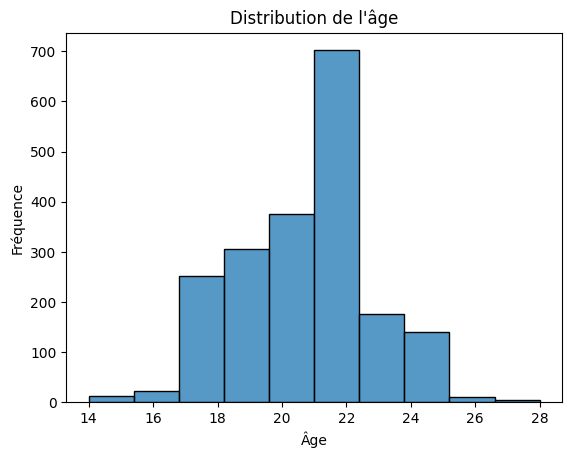

In [233]:
#la distribution de l'âge
sns.histplot(df['Age'], bins=10, kde=False)
plt.title("Distribution de l'âge")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

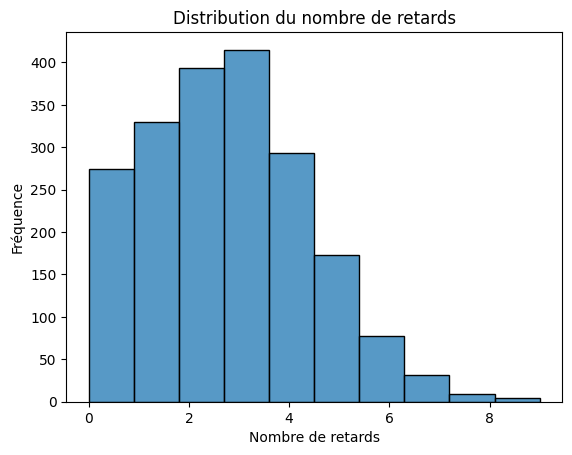

In [234]:
#la distribution du nombre de retards
sns.histplot(df['Nombre_retards'], bins=10, kde=False)
plt.title("Distribution du nombre de retards")
plt.xlabel("Nombre de retards")
plt.ylabel("Fréquence")
plt.show()

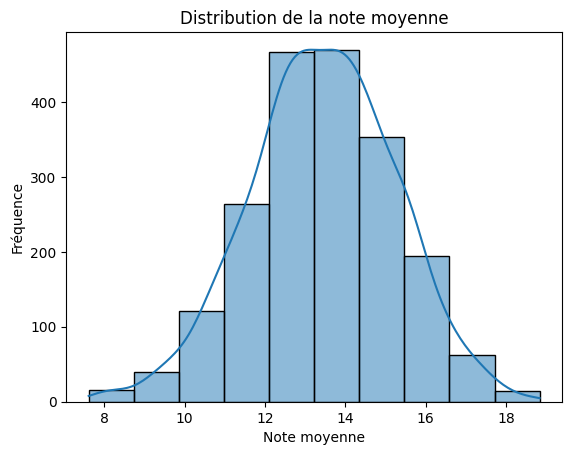

In [235]:
#La distribution de la note moyenne
sns.histplot(df['Note_moyenne'], bins=10, kde=True)
plt.title("Distribution de la note moyenne")
plt.xlabel("Note moyenne")
plt.ylabel("Fréquence")
plt.show()

<Axes: xlabel='Sexe'>

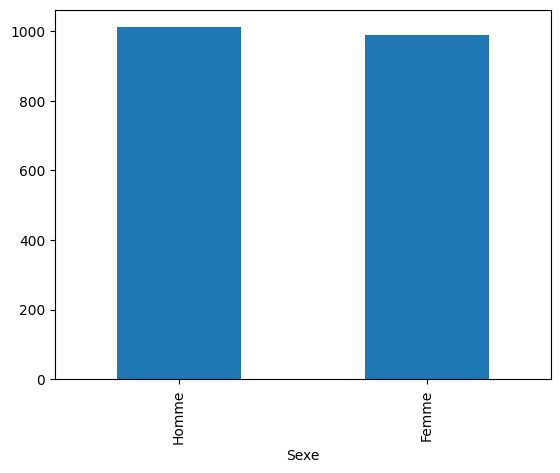

In [236]:
#La distribution du sexe
df.Sexe.value_counts().plot(kind='bar')

In [237]:
df.Situation_familiale.unique()

array(['Enfants à charge', 'Célibataire', 'Marié', 'Divorcé'],
      dtype=object)

<Axes: xlabel='Situation_familiale'>

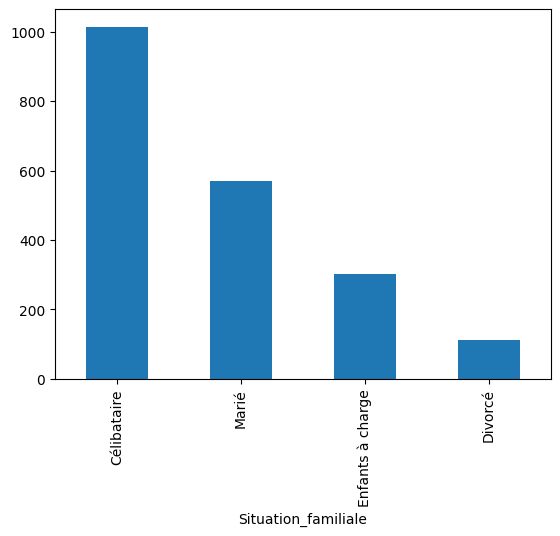

In [238]:
df.Situation_familiale.value_counts().plot(kind='bar')

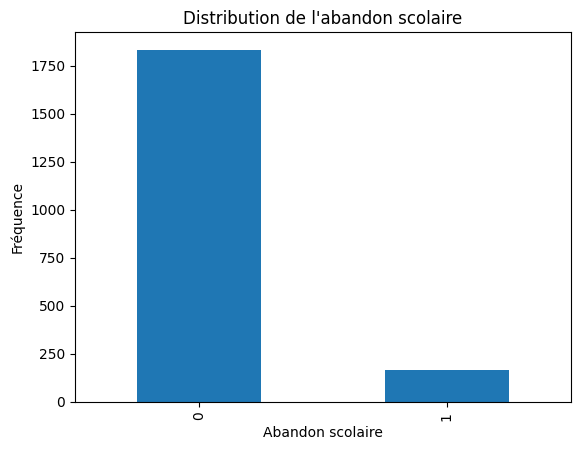

In [239]:
#La distribution de l'abandon
df.Abandon.value_counts().plot(kind='bar')
plt.title("Distribution de l'abandon scolaire")
plt.xlabel("Abandon scolaire")
plt.ylabel("Fréquence")
plt.show()

### Résumé des données

On a 2000 étudiants dans ce jeu de données.

- **Âge** : la moyenne est de 20,6 ans. La plupart ont entre 19 et 22 ans.
- **Taux de présence** : en moyenne 84,6 %. La majorité des étudiants sont souvent présents.
- **Nombre de retards** : en moyenne 2 à 3 retards par étudiant. Certains n’en ont aucun, d’autres jusqu’à 9.
- **Note moyenne** : environ 13,4 /20. Les notes sont bonnes en général.
- **Abandon** : 8,4 % des étudiants abandonnent. La majorité reste.

### Conclusion
Les étudiants sont jeunes, présents en cours, avec de bonnes notes et peu d’abandons.

### Normalisation et encodage 

In [240]:
df_normalized = df.copy()

In [241]:
# Encoder la colonne Sexe
label_encoder = LabelEncoder()
df_normalized['Sexe'] = label_encoder.fit_transform(df_normalized['Sexe'])

In [ ]:
from sentence_transformers import SentenceTransformer


# Charger le modèle CamemBERT
model =  SentenceTransformer("dangvantuan/sentence-camembert-base")

# Encoder la colonne Situation_familiale
situation_familiale_embeddings = model.encode(df_normalized['Situation_familiale'].tolist())

# Ajouter les embeddings au DataFrame
for i in range(situation_familiale_embeddings.shape[1]):
    df_normalized[f'Situation_familiale_emb_{i}'] = situation_familiale_embeddings[:, i]

In [243]:
df_normalized.head()

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,Abandon,Situation_familiale_emb_0,Situation_familiale_emb_1,Situation_familiale_emb_2,...,Situation_familiale_emb_758,Situation_familiale_emb_759,Situation_familiale_emb_760,Situation_familiale_emb_761,Situation_familiale_emb_762,Situation_familiale_emb_763,Situation_familiale_emb_764,Situation_familiale_emb_765,Situation_familiale_emb_766,Situation_familiale_emb_767
0,21,0,89.585023,2,15.826896,Enfants à charge,0,0.036014,0.076774,0.044001,...,-0.018565,0.053275,0.127430,0.018776,0.104706,0.058765,-0.093332,0.035901,-0.105496,0.310760
1,20,1,70.713068,3,12.829358,Célibataire,0,-0.133212,0.069986,0.067941,...,0.017424,-0.136768,-0.051657,0.162619,-0.114968,0.084216,0.053738,0.103432,0.126132,0.319013
2,22,0,82.122963,1,13.086319,Enfants à charge,0,0.036014,0.076774,0.044001,...,-0.018565,0.053275,0.127430,0.018776,0.104706,0.058765,-0.093332,0.035901,-0.105496,0.310760
3,24,1,87.408859,3,14.992032,Célibataire,0,-0.133212,0.069986,0.067941,...,0.017424,-0.136768,-0.051657,0.162619,-0.114968,0.084216,0.053738,0.103432,0.126132,0.319013
4,20,1,86.470676,3,12.671649,Marié,0,-0.070635,0.128800,0.048252,...,-0.020175,-0.083246,-0.057411,0.148595,-0.066943,0.091293,-0.031461,0.132042,0.104782,0.196624


In [246]:
#Supprimer la colonne Situation_familiale
df_normalized.drop(columns=['Situation_familiale'], inplace=True)

In [247]:
df_normalized.head()

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Abandon,Situation_familiale_emb_0,Situation_familiale_emb_1,Situation_familiale_emb_2,Situation_familiale_emb_3,...,Situation_familiale_emb_758,Situation_familiale_emb_759,Situation_familiale_emb_760,Situation_familiale_emb_761,Situation_familiale_emb_762,Situation_familiale_emb_763,Situation_familiale_emb_764,Situation_familiale_emb_765,Situation_familiale_emb_766,Situation_familiale_emb_767
0,21,0,89.585023,2,15.826896,0,0.036014,0.076774,0.044001,0.068476,...,-0.018565,0.053275,0.127430,0.018776,0.104706,0.058765,-0.093332,0.035901,-0.105496,0.310760
1,20,1,70.713068,3,12.829358,0,-0.133212,0.069986,0.067941,-0.048096,...,0.017424,-0.136768,-0.051657,0.162619,-0.114968,0.084216,0.053738,0.103432,0.126132,0.319013
2,22,0,82.122963,1,13.086319,0,0.036014,0.076774,0.044001,0.068476,...,-0.018565,0.053275,0.127430,0.018776,0.104706,0.058765,-0.093332,0.035901,-0.105496,0.310760
3,24,1,87.408859,3,14.992032,0,-0.133212,0.069986,0.067941,-0.048096,...,0.017424,-0.136768,-0.051657,0.162619,-0.114968,0.084216,0.053738,0.103432,0.126132,0.319013
4,20,1,86.470676,3,12.671649,0,-0.070635,0.128800,0.048252,-0.094971,...,-0.020175,-0.083246,-0.057411,0.148595,-0.066943,0.091293,-0.031461,0.132042,0.104782,0.196624


In [248]:
# Normaliser les autres variables
scaler = StandardScaler()
columns_to_normalize = ['Age', 'Taux_presence', 'Nombre_retards', 'Note_moyenne']
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

In [249]:
df_normalized.head()

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Abandon,Situation_familiale_emb_0,Situation_familiale_emb_1,Situation_familiale_emb_2,Situation_familiale_emb_3,...,Situation_familiale_emb_758,Situation_familiale_emb_759,Situation_familiale_emb_760,Situation_familiale_emb_761,Situation_familiale_emb_762,Situation_familiale_emb_763,Situation_familiale_emb_764,Situation_familiale_emb_765,Situation_familiale_emb_766,Situation_familiale_emb_767
0,0.202206,0,0.624749,-0.331971,1.319016,0,0.036014,0.076774,0.044001,0.068476,...,-0.018565,0.053275,0.127430,0.018776,0.104706,0.058765,-0.093332,0.035901,-0.105496,0.310760
1,-0.294615,1,-1.758076,0.227373,-0.338153,0,-0.133212,0.069986,0.067941,-0.048096,...,0.017424,-0.136768,-0.051657,0.162619,-0.114968,0.084216,0.053738,0.103432,0.126132,0.319013
2,0.699027,0,-0.317431,-0.891315,-0.196094,0,0.036014,0.076774,0.044001,0.068476,...,-0.018565,0.053275,0.127430,0.018776,0.104706,0.058765,-0.093332,0.035901,-0.105496,0.310760
3,1.692670,1,0.349980,0.227373,0.857467,0,-0.133212,0.069986,0.067941,-0.048096,...,0.017424,-0.136768,-0.051657,0.162619,-0.114968,0.084216,0.053738,0.103432,0.126132,0.319013
4,-0.294615,1,0.231523,0.227373,-0.425342,0,-0.070635,0.128800,0.048252,-0.094971,...,-0.020175,-0.083246,-0.057411,0.148595,-0.066943,0.091293,-0.031461,0.132042,0.104782,0.196624


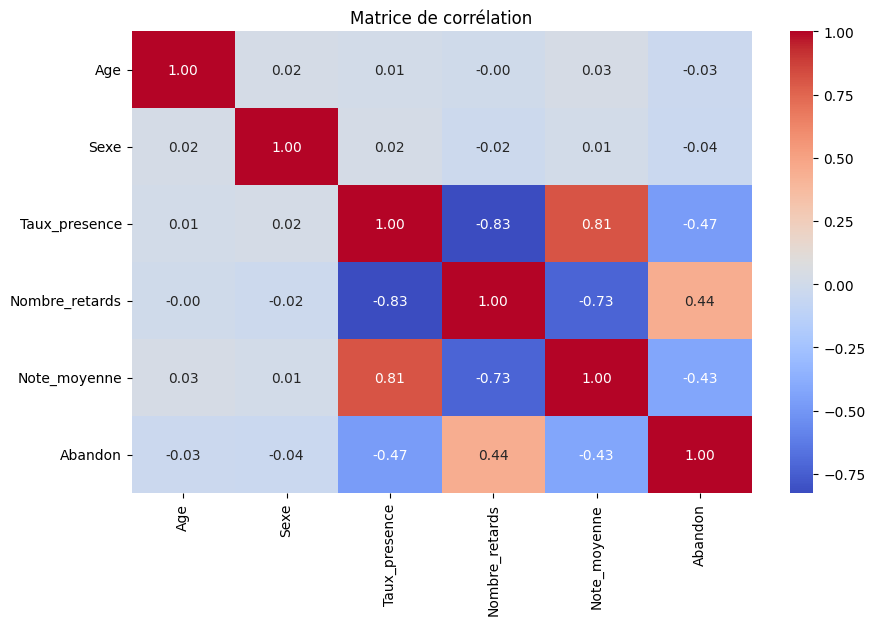

In [250]:
# Sélection des colonnes d'intérêt
columns_of_interest = ['Age', 'Sexe', 'Taux_presence', 'Nombre_retards', 'Note_moyenne', 'Abandon']

# Calcul de la matrice de corrélation
correlation_matrix = df_normalized[columns_of_interest].corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

**Interprétation :**

La variable cible `Abandon` est négativement corrélée avec le `Taux_presence` (-0.47) et la `Note_moyenne` (-0.43), ce qui signifie qu’un bon taux de présence et de bonnes notes réduisent le risque d’abandon. À l’inverse, le `Nombre_retards` est positivement corrélé à l’abandon (0.44) : plus un élève accumule de retards, plus il est susceptible d’abandonner. L’âge et le sexe n'ont pas de lien significatif avec l’abandon.


### PCA

In [251]:
from sklearn.decomposition import PCA

In [252]:
# Appliquer PCA pour réduire les dimensions
pca = PCA(n_components=10)  
pca_result = pca.fit_transform(df_normalized)

In [253]:
#Analyse de variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

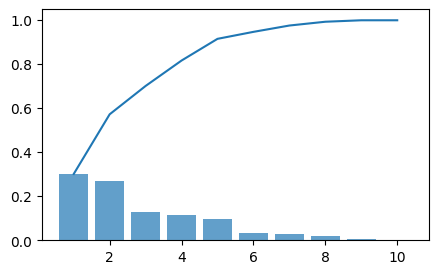

In [254]:
plt.figure(figsize=(5,3))
plt.bar(range(1,len(explained_variance) + 1),explained_variance,alpha=0.7,label='explained_variance')
plt.plot(range(1,len(cumulative_variance) + 1),cumulative_variance, label='cumulative_variance')
plt.show()

**Interprétation :**  

Après l’application des embeddings, le nombre de colonnes dans notre jeu de données est passé de 7 à 774. Cette forte augmentation est due à la vectorisation des variables textuelles en plusieurs dimensions. Afin de réduire la dimensionnalité tout en conservant l’essentiel de l’information, nous avons appliqué une Analyse en Composantes Principales (ACP). Celle-ci nous permet de ramener le nombre de colonnes à 8, tout en conservant plus de 90 % de la variance expliquée, c'est-à-dire l'information pertinente du jeu de données.


### Modélisation

In [272]:
# Diviser les données en ensembles d'entraînement et de test
train_x, test_x, train_y, test_y = train_test_split(pca_result[:, :8], 
                                                    df_normalized['Abandon'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [273]:
print(f"Taille de l'ensemble d'entraînement (train_x): {train_x.shape}")
print(f"Taille de l'ensemble d'entraînement (train_y): {train_y.shape}")
print(f"Taille de l'ensemble de test (test_x): {test_x.shape}")
print(f"Taille de l'ensemble de test (test_y): {test_y.shape}")

Taille de l'ensemble d'entraînement (train_x): (1600, 8)
Taille de l'ensemble d'entraînement (train_y): (1600,)
Taille de l'ensemble de test (test_x): (400, 8)
Taille de l'ensemble de test (test_y): (400,)


In [274]:
train_y.value_counts()

Abandon
0    1462
1     138
Name: count, dtype: int64

In [275]:
test_y.value_counts()

Abandon
0    370
1     30
Name: count, dtype: int64

##### Model - KNN

In [276]:
# Définir les paramètres à tester
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialiser le modèle KNN
knn = KNeighborsClassifier()

# Configurer GridSearchCV avec une métrique adaptée au déséquilibre (f1_score)
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='f1', verbose=1)

# Entraîner le modèle avec GridSearch
grid_search_knn.fit(train_x, train_y)

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres :", grid_search_knn.best_params_)
print("Meilleur score :", grid_search_knn.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Meilleurs paramètres : {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Meilleur score : 0.5313958761799293


In [277]:
best_model = grid_search_knn.best_estimator_
y_pred = best_model.predict(test_x)
print("Classification Report:")
print(classification_report(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       370
           1       0.88      0.47      0.61        30

    accuracy                           0.95       400
   macro avg       0.92      0.73      0.79       400
weighted avg       0.95      0.95      0.95       400



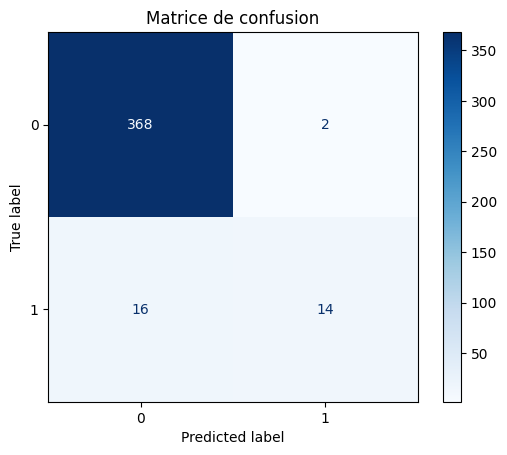

In [278]:
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

##### Model - Arbre de decision

In [ ]:
# Définir les paramètres à tester
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Initialiser le modèle DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Configurer GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='f1', verbose=1)

# Entraîner le modèle avec GridSearch
grid_search_dt.fit(train_x, train_y)

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres :", grid_search_dt.best_params_)
print("Meilleur score :", grid_search_dt.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs paramètres : {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Meilleur score : 0.5864966470229628


In [283]:
best_model = grid_search_dt.best_estimator_
y_pred = best_model.predict(test_x)
print("Classification Report:")
print(classification_report(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       370
           1       0.60      0.80      0.69        30

    accuracy                           0.94       400
   macro avg       0.79      0.88      0.83       400
weighted avg       0.95      0.94      0.95       400



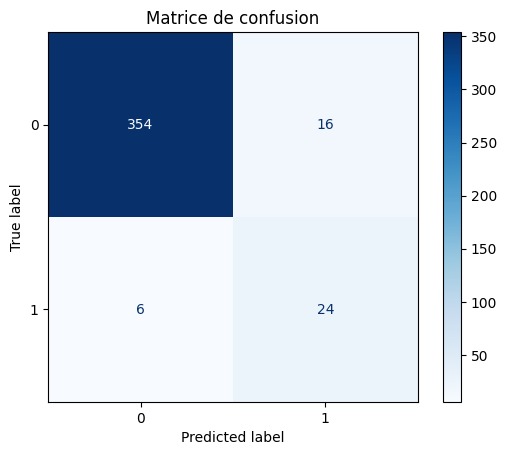

In [284]:
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

##### Model - RandomForest

In [299]:
# Définir les paramètres à tester
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Initialiser le modèle RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Configurer GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1', verbose=1)

# Entraîner le modèle avec GridSearch
grid_search_rf.fit(train_x, train_y)

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres :", grid_search_rf.best_params_)
print("Meilleur score :", grid_search_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs paramètres : {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Meilleur score : 0.6631200442559468


In [300]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(test_x)
print("Classification Report:")
print(classification_report(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       370
           1       0.82      0.77      0.79        30

    accuracy                           0.97       400
   macro avg       0.90      0.88      0.89       400
weighted avg       0.97      0.97      0.97       400



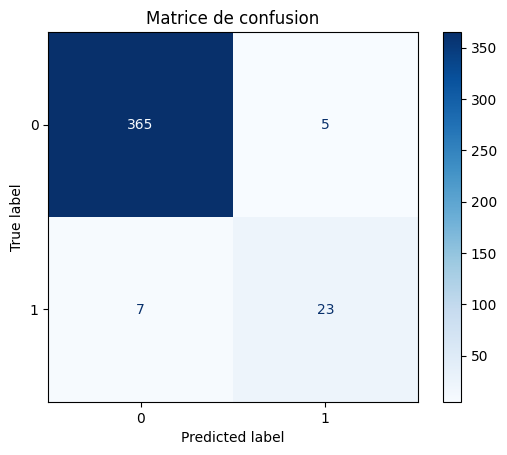

In [287]:
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

#### Model - Regression logistique

In [ ]:
# Définir les paramètres à tester
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],  # 'saga' supporte l1, l2 et elasticnet
    'class_weight': ['balanced'],
    'l1_ratio': [0.1, 0.5, 0.9]  # Utilisé uniquement pour elasticnet
}

# Initialiser le modèle LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)

# Configurer GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='f1', verbose=1)

# Entraîner le modèle avec GridSearch
grid_search_lr.fit(train_x, train_y)

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres :", grid_search_lr.best_params_)
print("Meilleur score :", grid_search_lr.best_score_)

In [289]:
best_model = grid_search_lr.best_estimator_
y_pred = best_model.predict(test_x)
print("Classification Report:")
print(classification_report(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       370
           1       0.45      0.97      0.61        30

    accuracy                           0.91       400
   macro avg       0.72      0.93      0.78       400
weighted avg       0.96      0.91      0.92       400



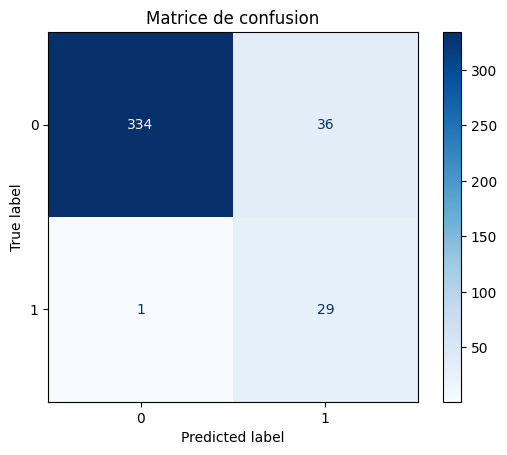

In [290]:
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

Essayons different threeshold

In [291]:
# Obtenir les probabilités prédites pour la classe positive
y_prob = best_model.predict_proba(test_x)[:, 1]

# Tester différents seuils
thresholds = [i * 0.1 for i in range(1, 10)]
best_threshold = 0
best_f1 = 0

for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    f1 = f1_score(test_y, y_pred_threshold)
    print(f"Seuil: {threshold:.1f}, F1-score: {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\nMeilleur seuil: {best_threshold:.1f} avec un F1-score de {best_f1:.4f}")

Seuil: 0.1, F1-score: 0.2985
Seuil: 0.2, F1-score: 0.3797
Seuil: 0.3, F1-score: 0.4394
Seuil: 0.4, F1-score: 0.5273
Seuil: 0.5, F1-score: 0.6105
Seuil: 0.6, F1-score: 0.6914
Seuil: 0.7, F1-score: 0.7027
Seuil: 0.8, F1-score: 0.6557
Seuil: 0.9, F1-score: 0.5778

Meilleur seuil: 0.7 avec un F1-score de 0.7027


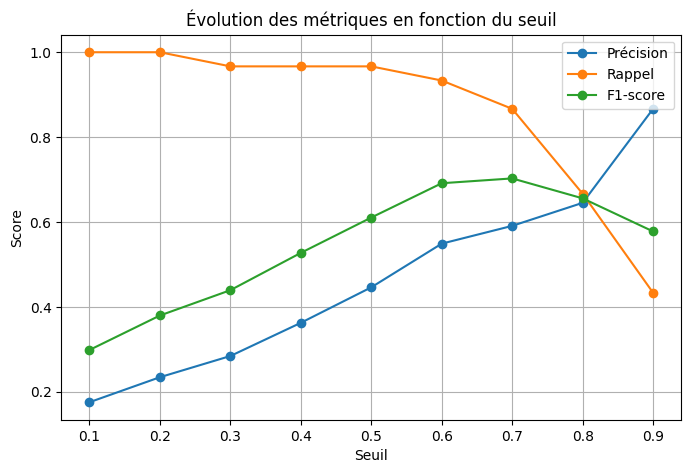

In [292]:
# Tester différents seuils
thresholds = [i * 0.1 for i in range(1, 10)]
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    precision_scores.append(precision_score(test_y, y_pred_threshold))
    recall_scores.append(recall_score(test_y, y_pred_threshold))
    f1_scores.append(f1_score(test_y, y_pred_threshold))

# Afficher les résultats sur un graphe
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_scores, label='Précision', marker='o')
plt.plot(thresholds, recall_scores, label='Rappel', marker='o')
plt.plot(thresholds, f1_scores, label='F1-score', marker='o')
plt.title("Évolution des métriques en fonction du seuil")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

**Interprétation :**  

L'analyse de l'évolution des métriques en fonction du seuil de décision montre que le compromis optimal entre **précision** et **rappel** est atteint autour d'un **seuil de 0.7**. À ce seuil, le **F1-score** est maximal, traduisant un bon équilibre entre la capacité du modèle à détecter les abandons et à limiter les fausses alertes.  


In [293]:
threshold = 0.7
y_pred_threshold = (y_prob >= threshold).astype(int)
print("Classification Report:")
print(classification_report(test_y, y_pred_threshold))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       370
           1       0.59      0.87      0.70        30

    accuracy                           0.94       400
   macro avg       0.79      0.91      0.84       400
weighted avg       0.96      0.94      0.95       400



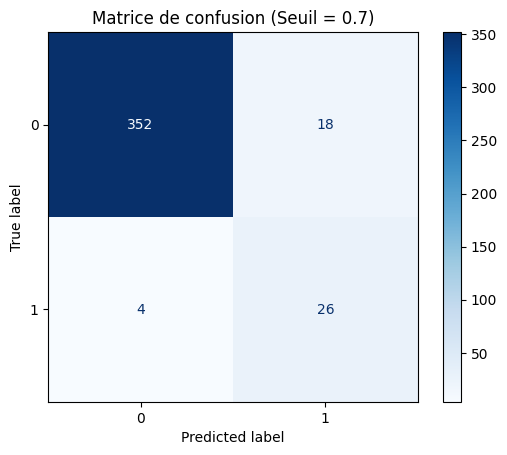

In [294]:
# Recalculer les prédictions avec un seuil de 0.7
threshold = 0.7
y_pred_threshold = (y_prob >= threshold).astype(int)

# Calculer et afficher la matrice de confusion
cm = confusion_matrix(test_y, y_pred_threshold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matrice de confusion (Seuil = {threshold})")
plt.show()

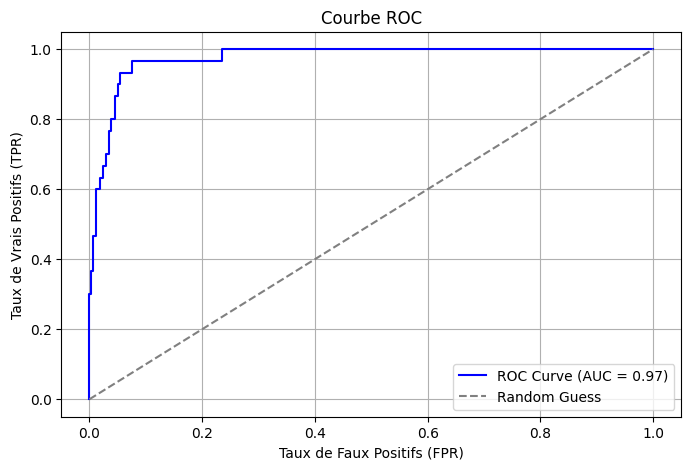

In [295]:
# Calculer les scores ROC
fpr, tpr, thresholds_roc = roc_curve(test_y, y_prob)
roc_auc = roc_auc_score(test_y, y_prob)

# Tracer la courbe ROC
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.title("Courbe ROC")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.legend()
plt.grid()
plt.show()

#### Model - Xgboost

In [ ]:
# Définir les paramètres à tester
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2, 5]  # Pour gérer le déséquilibre des classes
}

# Initialiser le modèle XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Configurer GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='f1', verbose=1)

# Entraîner le modèle avec GridSearch
grid_search_xgb.fit(train_x, train_y)

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres :", grid_search_xgb.best_params_)
print("Meilleur score :", grid_search_xgb.best_score_)

In [297]:
best_model = grid_search_xgb.best_estimator_
y_pred = best_model.predict(test_x)
print("Classification Report:")
print(classification_report(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       370
           1       0.80      0.93      0.86        30

    accuracy                           0.98       400
   macro avg       0.90      0.96      0.92       400
weighted avg       0.98      0.98      0.98       400



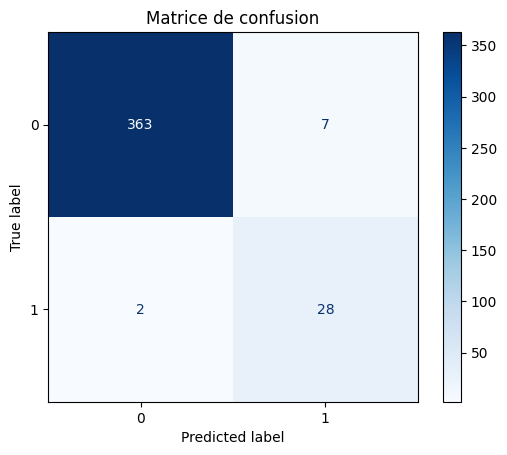

In [298]:
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

## 📊 Benchmark et Interprétation des Modèles (8 Composantes Principales)

Après réduction dimensionnelle en conservant **8 composantes principales**, voici les performances obtenues pour chaque modèle :

| Modèle                       | Précision (classe 1) | Rappel (classe 1) | F1-score (classe 1) | Accuracy |
|:----------------------------|:--------------------|:-----------------|:--------------------|:----------|
| **KNN**                      | 0.88                 | 0.47              | 0.61                 | 0.95      |
| **Arbre de Décision**        | 0.60                 | 0.80              | 0.69                 | 0.94      |
| **Random Forest**            | 0.82                 | 0.77              | 0.79                 | 0.97      |
| **Régression Logistique (0.7)** | 0.59              | 0.87              | 0.70                 | 0.94      |
| **XGBoost**                  | **0.80**             | **0.93**          | **0.86**             | **0.98**  |

> 📌 **Remarque :** Les valeurs de précision, rappel et F1-score concernent ici spécifiquement la **classe positive (1)**.

---

### 📌 Interprétation des Résultats

- **XGBoost** se démarque nettement comme **le meilleur modèle** :
  - Précision élevée (**0.80**) et excellent rappel (**0.93**).
  - F1-score équilibré (**0.86**) et **accuracy globale de 98%**.
  - Idéal pour maximiser à la fois la détection des cas positifs et la réduction des faux positifs.

- **Random Forest** arrive en deuxième position :
  - Bonne précision (**0.82**) et rappel satisfaisant (**0.77**).
  - F1-score à **0.79** et accuracy de **97%**.

- **Régression Logistique (seuil ajusté à 0.7)** :
  - Rappel élevé (**0.87**), intéressant pour détecter un maximum de cas positifs.
  - Précision plus faible (**0.59**), ce qui augmente le nombre de faux positifs.
  - F1-score de **0.70**.

- **Arbre de Décision** :
  - Bon rappel (**0.80**) mais précision limitée (**0.60**).
  - F1-score de **0.69**, performance correcte mais en retrait.

- **KNN** :
  - Meilleure précision (**0.88**), mais rappel très faible (**0.47**), ce qui le rend moins fiable pour détecter efficacement la classe 1.
  - F1-score de **0.61**, le plus faible du benchmark.

---

### ✅ Conclusion

- **XGBoost** est le modèle à privilégier dans ce contexte, offrant le meilleur équilibre entre précision et rappel pour la détection de la classe positive.
- **Random Forest** constitue une alternative intéressante avec des performances globales solides.
- **Régression Logistique** reste acceptable, notamment pour maximiser le rappel après ajustement du seuil.
- Les modèles **KNN** et **Arbre de Décision** montrent des performances plus limitées et sont moins adaptés à ce problème.

---

📌 **Remarque personnelle :**

En testant mes modèles avec **9 composantes principales**, j’ai constaté qu'ils atteignaient tous des scores parfaits (100%) sur l’ensemble des métriques (précision, rappel, f1-score, etc.) sur les données de test. Après analyse, j’explique ce phénomène par deux raisons principales :

1. **Les 9 premières composantes semblent capturer l’intégralité de l’information discriminante présente dans le dataset.** Autrement dit, elles résument toute la variance utile pour différencier les classes. Cela rend la séparation dans l’espace réduit très simple pour les algorithmes.

2. **Le dataset semble être soit très structuré, soit naturellement bien séparé** (linéairement ou quasi-linéairement) après réduction. En projetant les données sur ces 9 composantes, la frontière de décision devient quasi triviale pour tous les modèles, d’où ces performances parfaites.
